In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
flights=pd.read_csv("C:\\Users\\Devi\\Downloads\\flights.csv\\flights.csv")
flights=flights.sample(n=100000)
flights.head()

C:\Users\Devi\AppData\Local\Temp\ipykernel_15656\1966170758.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights=pd.read_csv("C:\\Users\\Devi\\Downloads\\flights.csv\\flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4330572,2015,9,27,7,B6,1685,N258JB,BOS,PIT,1515,...,1701.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2153991,2015,5,17,7,B6,700,N613JB,LAX,FLL,1430,...,2223.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2268611,2015,5,24,7,AS,514,N612AS,SEA,SNA,1655,...,1917.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5344954,2015,12,1,2,VX,334,N840VA,LAX,FLL,1025,...,1844.0,44.0,0,0,NaN,0.0,0.0,0.0,44.0,0.0
1728777,2015,4,21,2,UA,1122,N17126,MCO,EWR,800,...,1019.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flights.shape

(100000, 31)

In [8]:
flights.isnull().values.any()

True

In [9]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              277
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1477
DEPARTURE_DELAY         1477
TAXI_OUT                1538
WHEELS_OFF              1538
SCHEDULED_TIME             1
ELAPSED_TIME            1803
AIR_TIME                1803
DISTANCE                   0
WHEELS_ON               1596
TAXI_IN                 1596
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1596
ARRIVAL_DELAY           1803
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98449
AIR_SYSTEM_DELAY       81864
SECURITY_DELAY         81864
AIRLINE_DELAY          81864
LATE_AIRCRAFT_DELAY    81864
WEATHER_DELAY          81864
dtype: int64

<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

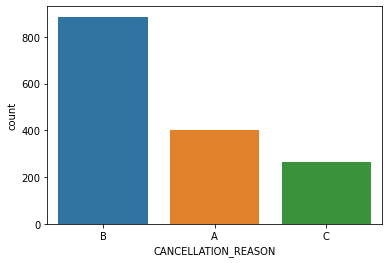

In [10]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

We can observe from graph easily that mostly weather is responsible for delays of flight.

<AxesSubplot:xlabel='MONTH', ylabel='count'>

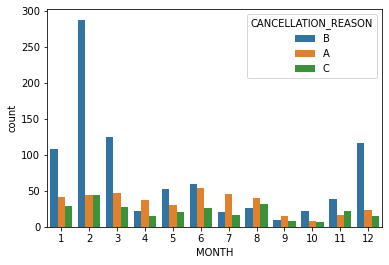

In [11]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

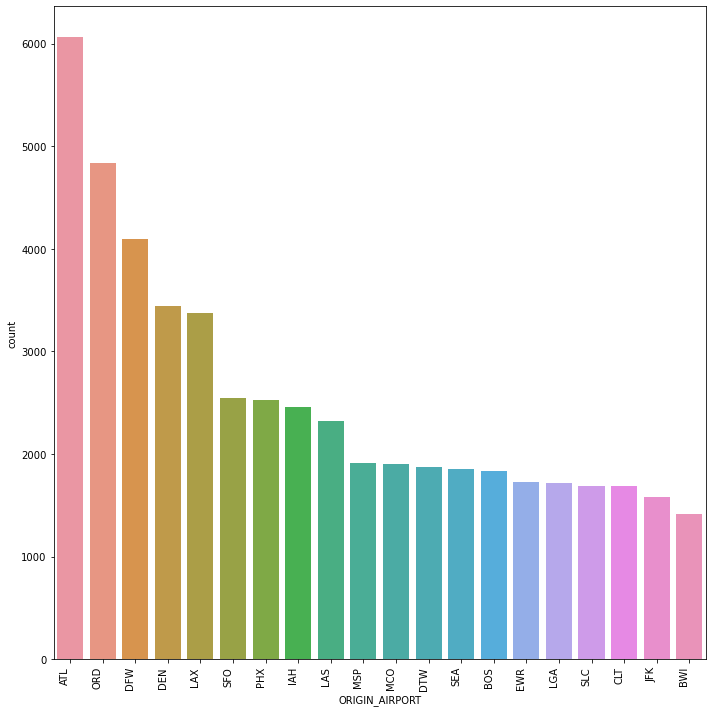

In [12]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

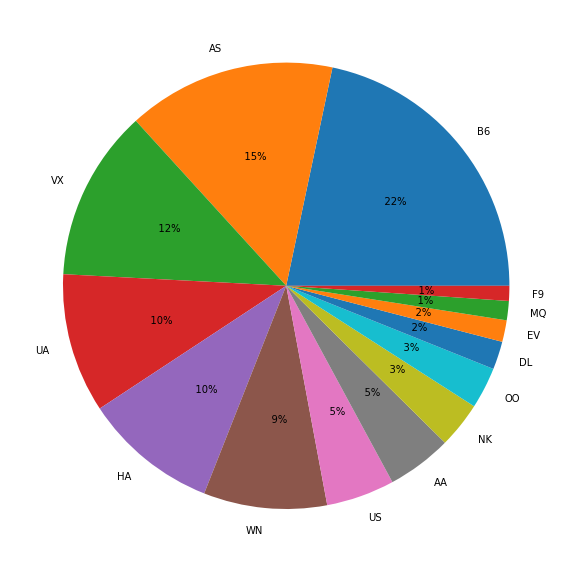

In [13]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

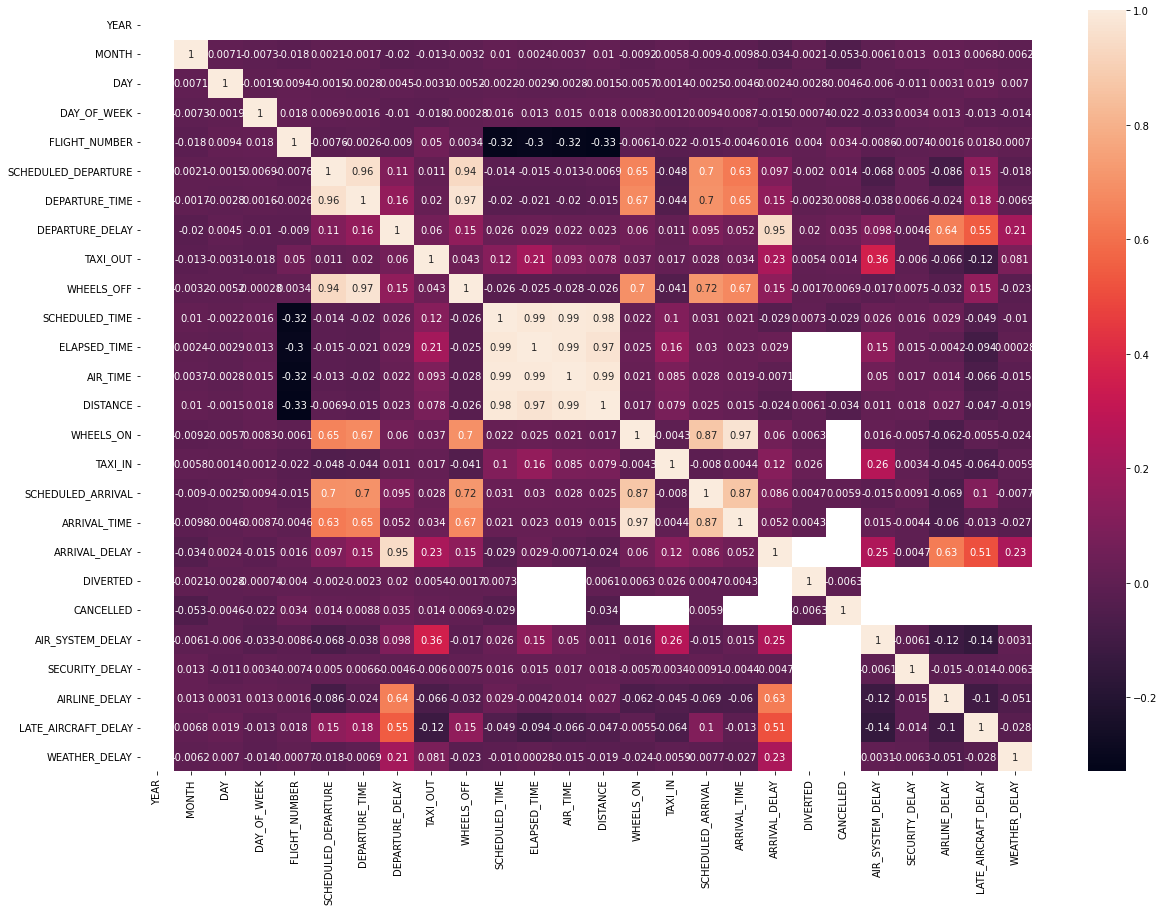

In [14]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

Very High Correlation Between Arrival Delay and Departure Delay

It shows that maximum of the Arrival Delays are due to the Departure Delays.

In [15]:
corr=flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.007081,-0.007332,-0.017579,0.002145,-0.001736,-0.020367,-0.013407,-0.003186,...,-0.009036,-0.009809,-0.034249,-0.002083,-0.053077,-0.006099,0.013406,0.013486,0.006780,-0.006237
DAY,NaN,0.007081,1.000000,-0.001879,0.009444,-0.001522,-0.002795,0.004475,-0.003136,-0.005191,...,-0.002505,-0.004639,0.002439,-0.002818,-0.004623,-0.005956,-0.011116,0.003084,0.019491,0.006956
DAY_OF_WEEK,NaN,-0.007332,-0.001879,1.000000,0.017603,0.006920,0.001583,-0.010172,-0.017501,-0.000279,...,0.009368,0.008686,-0.015251,-0.000745,-0.022414,-0.032959,0.003352,0.012641,-0.012700,-0.013664
FLIGHT_NUMBER,NaN,-0.017579,0.009444,0.017603,1.000000,-0.007647,-0.002607,-0.009030,0.050336,0.003353,...,-0.015010,-0.004624,0.016388,0.004030,0.033925,-0.008633,-0.007379,0.001597,0.017548,-0.000770
SCHEDULED_DEPARTURE,NaN,0.002145,-0.001522,0.006920,-0.007647,1.000000,0.962323,0.106157,0.011400,0.935585,...,0.697462,0.628821,0.096605,-0.002010,0.014256,-0.067550,0.005027,-0.086491,0.147173,-0.018471
DEPARTURE_TIME,NaN,-0.001736,-0.002795,0.001583,-0.002607,0.962323,1.000000,0.162673,0.019587,0.970613,...,0.703035,0.648776,0.152964,-0.002266,0.008834,-0.038027,0.006567,-0.023908,0.176266,-0.006884
DEPARTURE_DELAY,NaN,-0.020367,0.004475,-0.010172,-0.009030,0.106157,0.162673,1.000000,0.060080,0.152682,...,0.095033,0.051903,0.945491,0.020249,0.035417,0.097931,-0.004632,0.644931,0.545547,0.211687
TAXI_OUT,NaN,-0.013407,-0.003136,-0.017501,0.050336,0.011400,0.019587,0.060080,1.000000,0.043364,...,0.028081,0.034105,0.228140,0.005434,0.013837,0.356570,-0.005955,-0.065871,-0.119300,0.080893
WHEELS_OFF,NaN,-0.003186,-0.005191,-0.000279,0.003353,0.935585,0.970613,0.152682,0.043364,1.000000,...,0.715784,0.670204,0.147822,-0.001730,0.006925,-0.017383,0.007462,-0.032108,0.148342,-0.022830


In [16]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [17]:
airport = pd.read_csv("C:\\Users\\Devi\\Downloads\\airports.csv")
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [18]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4330572,9,27,7,B6,BOS,PIT,1515,7.0,496,4.0
2153991,5,17,7,B6,LAX,FLL,1430,4.0,2343,3.0
2268611,5,24,7,AS,SEA,SNA,1655,-9.0,978,-9.0
5344954,12,1,2,VX,LAX,FLL,1025,53.0,2343,44.0
1728777,4,21,2,UA,MCO,EWR,800,-8.0,937,-19.0
...,...,...,...,...,...,...,...,...,...,...
3542391,8,8,6,AS,LAX,SEA,1955,82.0,954,91.0
3777973,8,23,7,OO,SLC,BUR,838,-1.0,574,0.0
4002231,9,6,7,WN,LAS,PIT,1010,1.0,1910,-15.0
1143520,3,16,1,DL,SFO,ATL,730,-2.0,2139,-11.0


In [19]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

321
320
14


In [20]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4330572,9,27,7,B6,BOS,PIT,1515,7.0,496,4.0
2153991,5,17,7,B6,LAX,FLL,1430,4.0,2343,3.0
2268611,5,24,7,AS,SEA,SNA,1655,-9.0,978,-9.0
5344954,12,1,2,VX,LAX,FLL,1025,53.0,2343,44.0
1728777,4,21,2,UA,MCO,EWR,800,-8.0,937,-19.0
...,...,...,...,...,...,...,...,...,...,...
3542391,8,8,6,AS,LAX,SEA,1955,82.0,954,91.0
3777973,8,23,7,OO,SLC,BUR,838,-1.0,574,0.0
4002231,9,6,7,WN,LAS,PIT,1010,1.0,1910,-15.0
1143520,3,16,1,DL,SFO,ATL,730,-2.0,2139,-11.0


In [21]:
flights.shape

(98197, 10)

In [22]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4330572,9,27,SATURDAY,B6,BOS,PIT,1515,7.0,496,4.0
2153991,5,17,SATURDAY,B6,LAX,FLL,1430,4.0,2343,3.0
2268611,5,24,SATURDAY,AS,SEA,SNA,1655,-9.0,978,-9.0
5344954,12,1,MONDAY,VX,LAX,FLL,1025,53.0,2343,44.0
1728777,4,21,MONDAY,UA,MCO,EWR,800,-8.0,937,-19.0
...,...,...,...,...,...,...,...,...,...,...
3542391,8,8,FRIDAY,AS,LAX,SEA,1955,82.0,954,91.0
3777973,8,23,SATURDAY,OO,SLC,BUR,838,-1.0,574,0.0
4002231,9,6,SATURDAY,WN,LAS,PIT,1010,1.0,1910,-15.0
1143520,3,16,SUNDAY,DL,SFO,ATL,730,-2.0,2139,-11.0


In [23]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4330572,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2153991,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2268611,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5344954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1728777,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542391,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3777973,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4002231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1143520,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=658)

In [25]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [26]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [27]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4330572,9,27,1515,7.0,496,4.0
2153991,5,17,1430,4.0,2343,3.0
2268611,5,24,1655,-9.0,978,-9.0
5344954,12,1,1025,53.0,2343,44.0
1728777,4,21,800,-8.0,937,-19.0
...,...,...,...,...,...,...
3542391,8,8,1955,82.0,954,91.0
3777973,8,23,838,-1.0,574,0.0
4002231,9,6,1010,1.0,1910,-15.0
1143520,3,16,730,-2.0,2139,-11.0


In [28]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4330572,9,27,1515,7.0,496,4.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2153991,5,17,1430,4.0,2343,3.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2268611,5,24,1655,-9.0,978,-9.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5344954,12,1,1025,53.0,2343,44.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1728777,4,21,800,-8.0,937,-19.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542391,8,8,1955,82.0,954,91.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3777973,8,23,838,-1.0,574,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4002231,9,6,1010,1.0,1910,-15.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1143520,3,16,730,-2.0,2139,-11.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
data.shape

(98197, 664)

In [30]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3194391,7,19,1133,-8.0,1008,-32.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3403025,7,31,1500,5.0,3417,-10.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1986115,5,7,630,-5.0,888,-16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
435889,1,29,1525,36.0,642,25.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2612747,6,14,1525,-4.0,971,-22.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366975,7,29,1345,-1.0,140,-7.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
627702,2,11,1310,-5.0,594,-16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
530792,2,5,615,-7.0,1065,-24.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3161417,7,17,1020,-8.0,406,-15.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
final_data.shape

(60000, 664)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [34]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3194391,7,19,1133,1008,-32.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3403025,7,31,1500,3417,-10.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1986115,5,7,630,888,-16.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
435889,1,29,1525,642,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2612747,6,14,1525,971,-22.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366975,7,29,1345,140,-7.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
627702,2,11,1310,594,-16.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
530792,2,5,615,1065,-24.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3161417,7,17,1020,406,-15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
Y

3194391    -8.0
3403025     5.0
1986115    -5.0
435889     36.0
2612747    -4.0
           ... 
3366975    -1.0
627702     -5.0
530792     -7.0
3161417    -8.0
1560546     8.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
y_pred = reg_rf.predict(X_test)

In [39]:
reg_rf.score(X_train,y_train)

0.9884289222356428

In [40]:
reg_rf.score(X_test,y_test)

0.9248202523874065

In [41]:
metrics.r2_score(y_test,y_pred)

0.9248202523874065

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.019038333333333
MSE: 107.71082501666667
RMSE: 10.378382581918373


In [43]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
5648606,5.0,-0.08
1190313,89.0,78.74
177785,-3.0,-1.34
225285,0.0,1.88
2814995,-16.0,-0.17
...,...,...
3071475,-5.0,-5.51
378775,-7.0,-3.29
2913785,8.0,31.97
3023908,-4.0,-3.49


In [44]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [45]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [46]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [47]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  10.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   9.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 113,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [49]:
p=rf_random.predict(X_test)

In [50]:
metrics.r2_score(y_test,p)

0.9250107343678358

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 5.965876005891397
MSE: 107.43791945480484
RMSE: 10.365226454583848


In [52]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
5648606,5.0,-0.709323
1190313,89.0,77.249742
177785,-3.0,-1.227238
225285,0.0,1.782757
2814995,-16.0,-2.132059
...,...,...
3071475,-5.0,-4.382068
378775,-7.0,-3.076641
2913785,8.0,31.967172
3023908,-4.0,-3.862025


In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [54]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 5.965703796197842
MSE: 101.54180172868605
RMSE: 10.076795211211055


In [56]:
metrics.r2_score(y_test,pre)

0.9291260927125069

In [57]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
5648606,5.0,0.392461
1190313,89.0,72.110190
177785,-3.0,-0.602797
225285,0.0,1.300160
2814995,-16.0,-2.792184
...,...,...
3071475,-5.0,-3.240711
378775,-7.0,-4.056999
2913785,8.0,30.135885
3023908,-4.0,-4.529943


In [58]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [59]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

C:\Users\Devi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-3.9007748765834256

In [60]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
